Análise de Dados Aplicada a Computação<br>
Trabalho C3 - 5SC1

Alunos:
- Nicolas Lima Rosário

- Gabriel Vianna Fracalossi

- Bruno Coutinho Remeikis

- Daniel Vitor Medeiros de Souza

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.neighbors import LocalOutlierFactor


SalePrice: O preço de venda da propriedade em dólares. Essa é a variável-alvo que você está tentando prever.

MSSubClass: A classe de construção.

MSZoning: A classificação geral de zoneamento.

LotFrontage: Tamanho linear dos pés de rua conectados à propriedade.

LotArea: Tamanho do lote em pés quadrados.

Street: Tipo de acesso à rua.

Alley: Tipo de acesso a becos.

LotShape: Formato geral da propriedade.

LandContour: Planicidade da propriedade.

Utilities: Tipo de utilidades disponíveis.

LotConfig: Configuração do lote.

LandSlope: Declive da propriedade.

Neighborhood: Localizações físicas dentro dos limites da cidade de Ames.

Condition1: Proximidade da estrada principal ou ferrovia.

Condition2: Proximidade da segunda estrada principal ou ferrovia (se houver).

BldgType: Tipo de habitação.

HouseStyle: Estilo de habitação.

OverallQual: Qualidade geral de materiais e acabamento.

OverallCond: Classificação geral de condição.

YearBuilt: Data de construção original.

YearRemodAdd: Data de remodelação.

RoofStyle: Tipo de telhado.

RoofMatl: Material do telhado.

Exterior1st: Revestimento externo da casa.

Exterior2nd: Segundo revestimento externo da casa (se houver mais de um material).

MasVnrType: Tipo de revestimento em alvenaria.

MasVnrArea: Área de revestimento em alvenaria em pés quadrados.

ExterQual: Qualidade do material externo.

ExterCond: Condição atual do material externo.

Foundation: Tipo de fundação.

BsmtQual: Altura do porão.

BsmtCond: Condição geral do porão.

BsmtExposure: Porão com nível de saída ou paredes para o jardim.

BsmtFinType1: Qualidade da área de acabamento do porão.

BsmtFinSF1: Pés quadrados acabados do tipo 1.

BsmtFinType2: Qualidade da segunda área de acabamento do porão (se presente).

BsmtFinSF2: Pés quadrados acabados do tipo 2.

BsmtUnfSF: Pés quadrados não acabados da área do porão.

TotalBsmtSF: Pés quadrados totais da área do porão.

Heating: Tipo de aquecimento.

HeatingQC: Qualidade e condição do aquecimento.

CentralAir: Ar condicionado central.

Electrical: Sistema elétrico.

1stFlrSF: Pés quadrados do primeiro andar.

2ndFlrSF: Pés quadrados do segundo andar.

LowQualFinSF: Pés quadrados de área acabada de baixa qualidade (todos os andares).

GrLivArea: Pés quadrados da área habitável acima do nível do solo.

BsmtFullBath: Banheiros completos no porão.

BsmtHalfBath: Banheiros parciais no porão.

FullBath: Banheiros completos acima do nível do solo.

HalfBath: Lavabos acima do nível do solo.

Bedroom: Número de quartos acima do nível do porão.

Kitchen: Número de cozinhas.

KitchenQual: Qualidade da cozinha.

TotRmsAbvGrd: Total de quartos acima do nível do solo (não inclui banheiros).

Functional: Classificação da funcionalidade da casa.

Fireplaces: Número de lareiras.

FireplaceQu: Qualidade da lareira.

GarageType: Localização da garagem.

GarageYrBlt: Ano em que a garagem foi construída.

GarageFinish: Acabamento interno da garagem.

GarageCars: Capacidade da garagem em número de carros.

GarageArea: Tamanho da garagem em pés quadrados.

GarageQual: Qualidade da garagem.

GarageCond: Condição da garagem.

PavedDrive: Entrada pavimentada.

WoodDeckSF: Área do deck de madeira em pés quadrados.

OpenPorchSF: Área de varanda aberta em pés quadrados.

EnclosedPorch: Área de varanda fechada em pés quadrados.

3SsnPorch: Área da varanda de três estações em pés quadrados.

ScreenPorch: Área da varanda de tela em pés quadrados.

PoolArea: Área da piscina em pés quadrados.

PoolQC: Qualidade da piscina.

Fence: Qualidade da cerca.

MiscFeature: Característica diversa não coberta em outras categorias.

MiscVal: Valor da característica diversa.

MoSold: Mês de venda.

YrSold: Ano de venda.

SaleType: Tipo de venda.

SaleCondition: Condição de venda.

In [3]:
df_original = pd.read_csv("C:/Users/User/Desktop/train.csv", sep=",")
df_original.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
df_original2 = pd.read_csv("C:/Users/User/Desktop/test.csv", sep=",")
df_original2.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
valores_faltantes = df_original.isnull().sum()
print(valores_faltantes)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
pd.set_option('display.max_columns', None)


In [7]:
df_original2



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [8]:
# Se um valor em uma única linha for nulo, mas o resto dela não, eu apago a linha inteira ou apago a coluna, o que fazer.

In [9]:
colunas_valores_nulos = df_original.columns[df_original.isnull().all()]
print(colunas_valores_nulos)

Index([], dtype='object')


In [10]:
colunas_com_valores_nulos = df_original.columns[df_original.isnull().any()]
print(colunas_com_valores_nulos)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [11]:
# Remover todas as colunas com pelo menos um valor nulo
# Pensamos entre isso ou remover todas as linhas com valores nulos nestas colunas

In [12]:
# Drop valores nulos

df_sem_nulos = df_original.dropna(axis=1)

# Drop da coluna Id

df_sem_nulos = df_sem_nulos.drop('Id', axis=1)

df_sem_nulos

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


# Análise dos dados

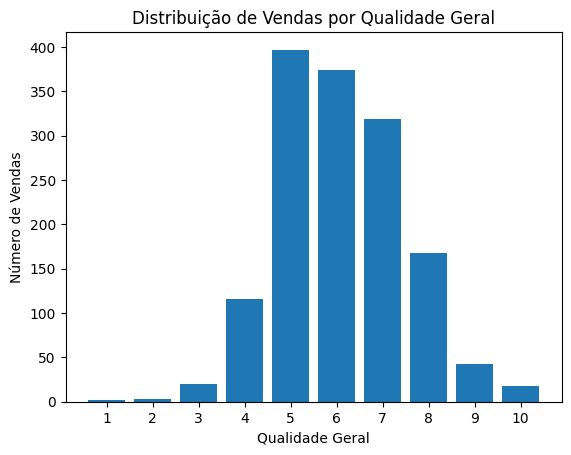

In [13]:
# Calcular a contagem de vendas para cada nível de qualidade geral
sales_by_quality = df_sem_nulos['OverallQual'].value_counts().sort_index()

# Plotar o gráfico de barras mostrando a distribuição das vendas por qualidade geral
plt.bar(sales_by_quality.index, sales_by_quality.values)
plt.xlabel('Qualidade Geral')
plt.ylabel('Número de Vendas')
plt.title('Distribuição de Vendas por Qualidade Geral')
plt.xticks(sales_by_quality.index)
plt.show()


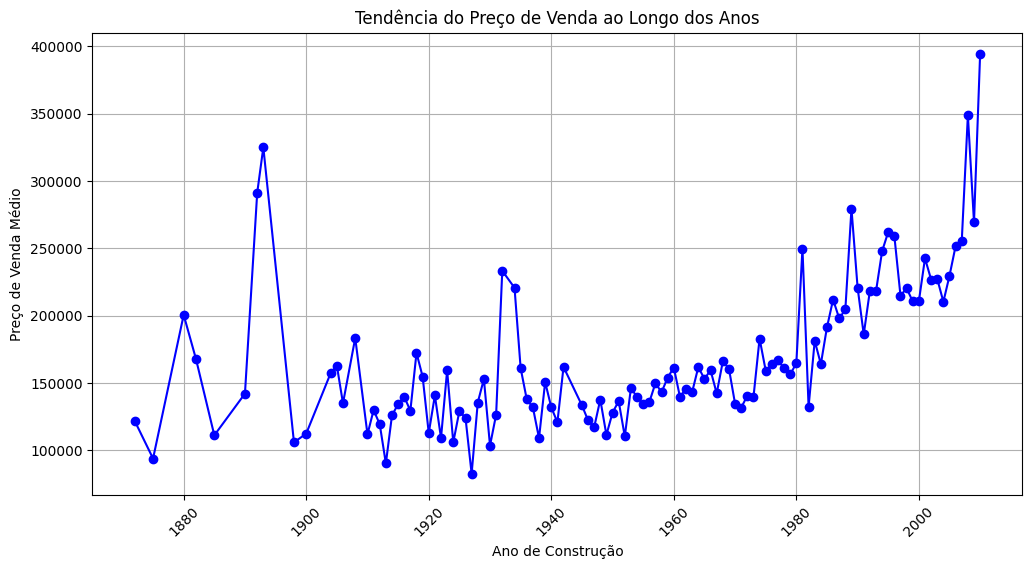

In [14]:
# Agrupar as vendas pelo ano de construção e calcular a média do preço de venda para cada ano
year_sale_avg = df_sem_nulos.groupby('YearBuilt')['SalePrice'].mean()

# Criar um gráfico de linha mostrando a tendência do preço de venda ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(year_sale_avg.index, year_sale_avg.values, marker='o', linestyle='-', color='b')
plt.title('Tendência do Preço de Venda ao Longo dos Anos')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço de Venda Médio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

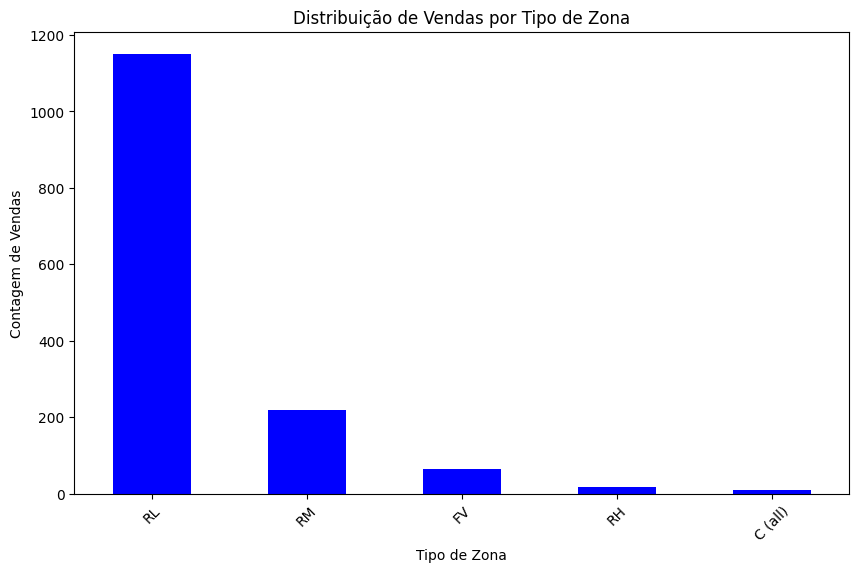

In [15]:
contagem_zonas = df_sem_nulos['MSZoning'].value_counts()

plt.figure(figsize=(10, 6))
contagem_zonas.plot(kind='bar', color='blue')
plt.title('Distribuição de Vendas por Tipo de Zona')
plt.xlabel('Tipo de Zona')
plt.ylabel('Contagem de Vendas')
plt.xticks(rotation=45)
plt.show()

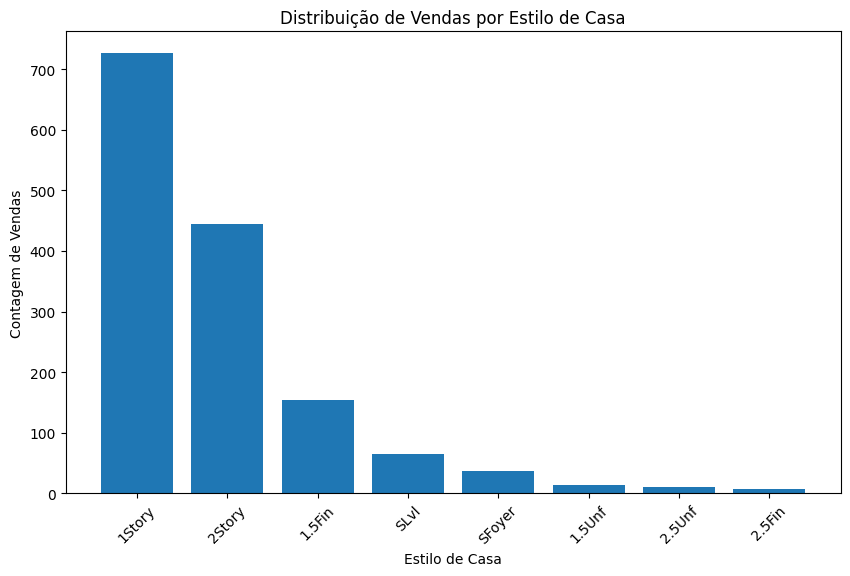

In [16]:
house_style_counts = df_sem_nulos['HouseStyle'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(house_style_counts.index, house_style_counts.values)
plt.xlabel('Estilo de Casa')
plt.ylabel('Contagem de Vendas')
plt.title('Distribuição de Vendas por Estilo de Casa')
plt.xticks(rotation=45)
plt.show()

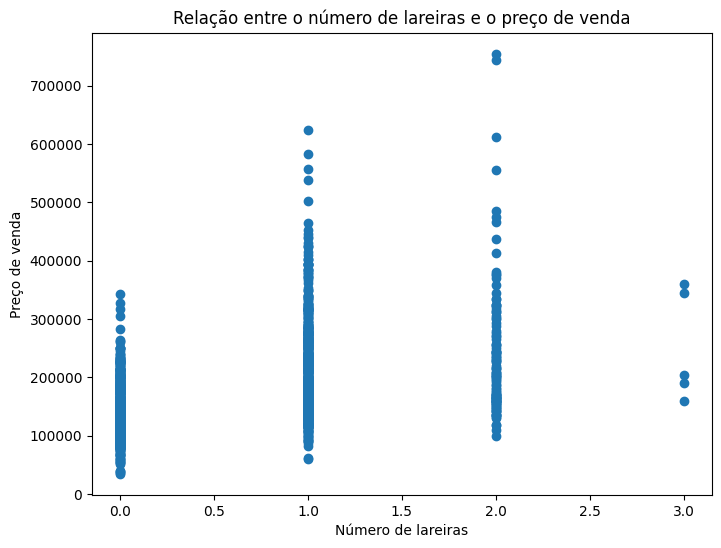

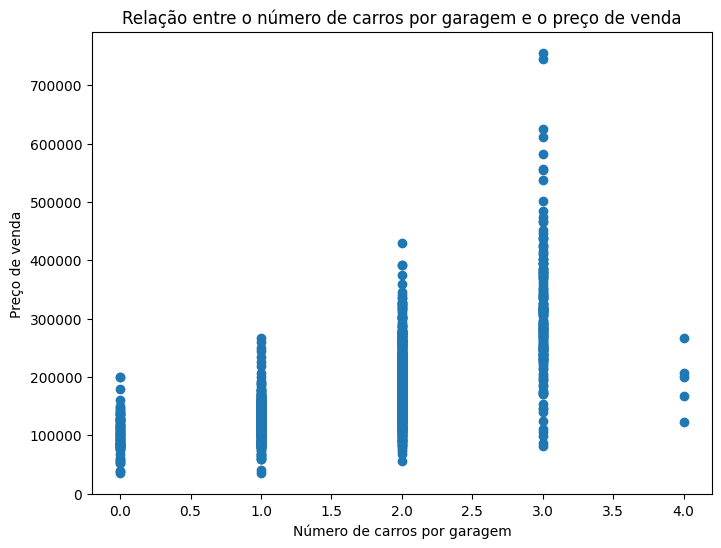

In [17]:
# Extraia as colunas de interesse
num_lareiras = df_sem_nulos['Fireplaces']
preco_venda = df_sem_nulos['SalePrice']

plt.figure(figsize=(8, 6))

# Plote o gráfico de dispersão
plt.scatter(num_lareiras, preco_venda)

# Adicione rótulos e título do gráfico
plt.xlabel('Número de lareiras')
plt.ylabel('Preço de venda')
plt.title('Relação entre o número de lareiras e o preço de venda')

# Exiba o gráfico
plt.show()



# Extraia as colunas de interesse
num_carros = df_sem_nulos['GarageCars']
preco_venda = df_sem_nulos['SalePrice']

plt.figure(figsize=(8, 6))

# Plote o gráfico de dispersão
plt.scatter(num_carros, preco_venda)

# Adicione rótulos e título do gráfico
plt.xlabel('Número de carros por garagem')
plt.ylabel('Preço de venda')
plt.title('Relação entre o número de carros por garagem e o preço de venda')

# Exiba o gráfico
plt.show()


# Correlação das tabelas sem valores nulos

C:\Users\User\AppData\Local\Temp\ipykernel_10316\1064124214.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tabela_correlacao = df_sem_nulos.corr()


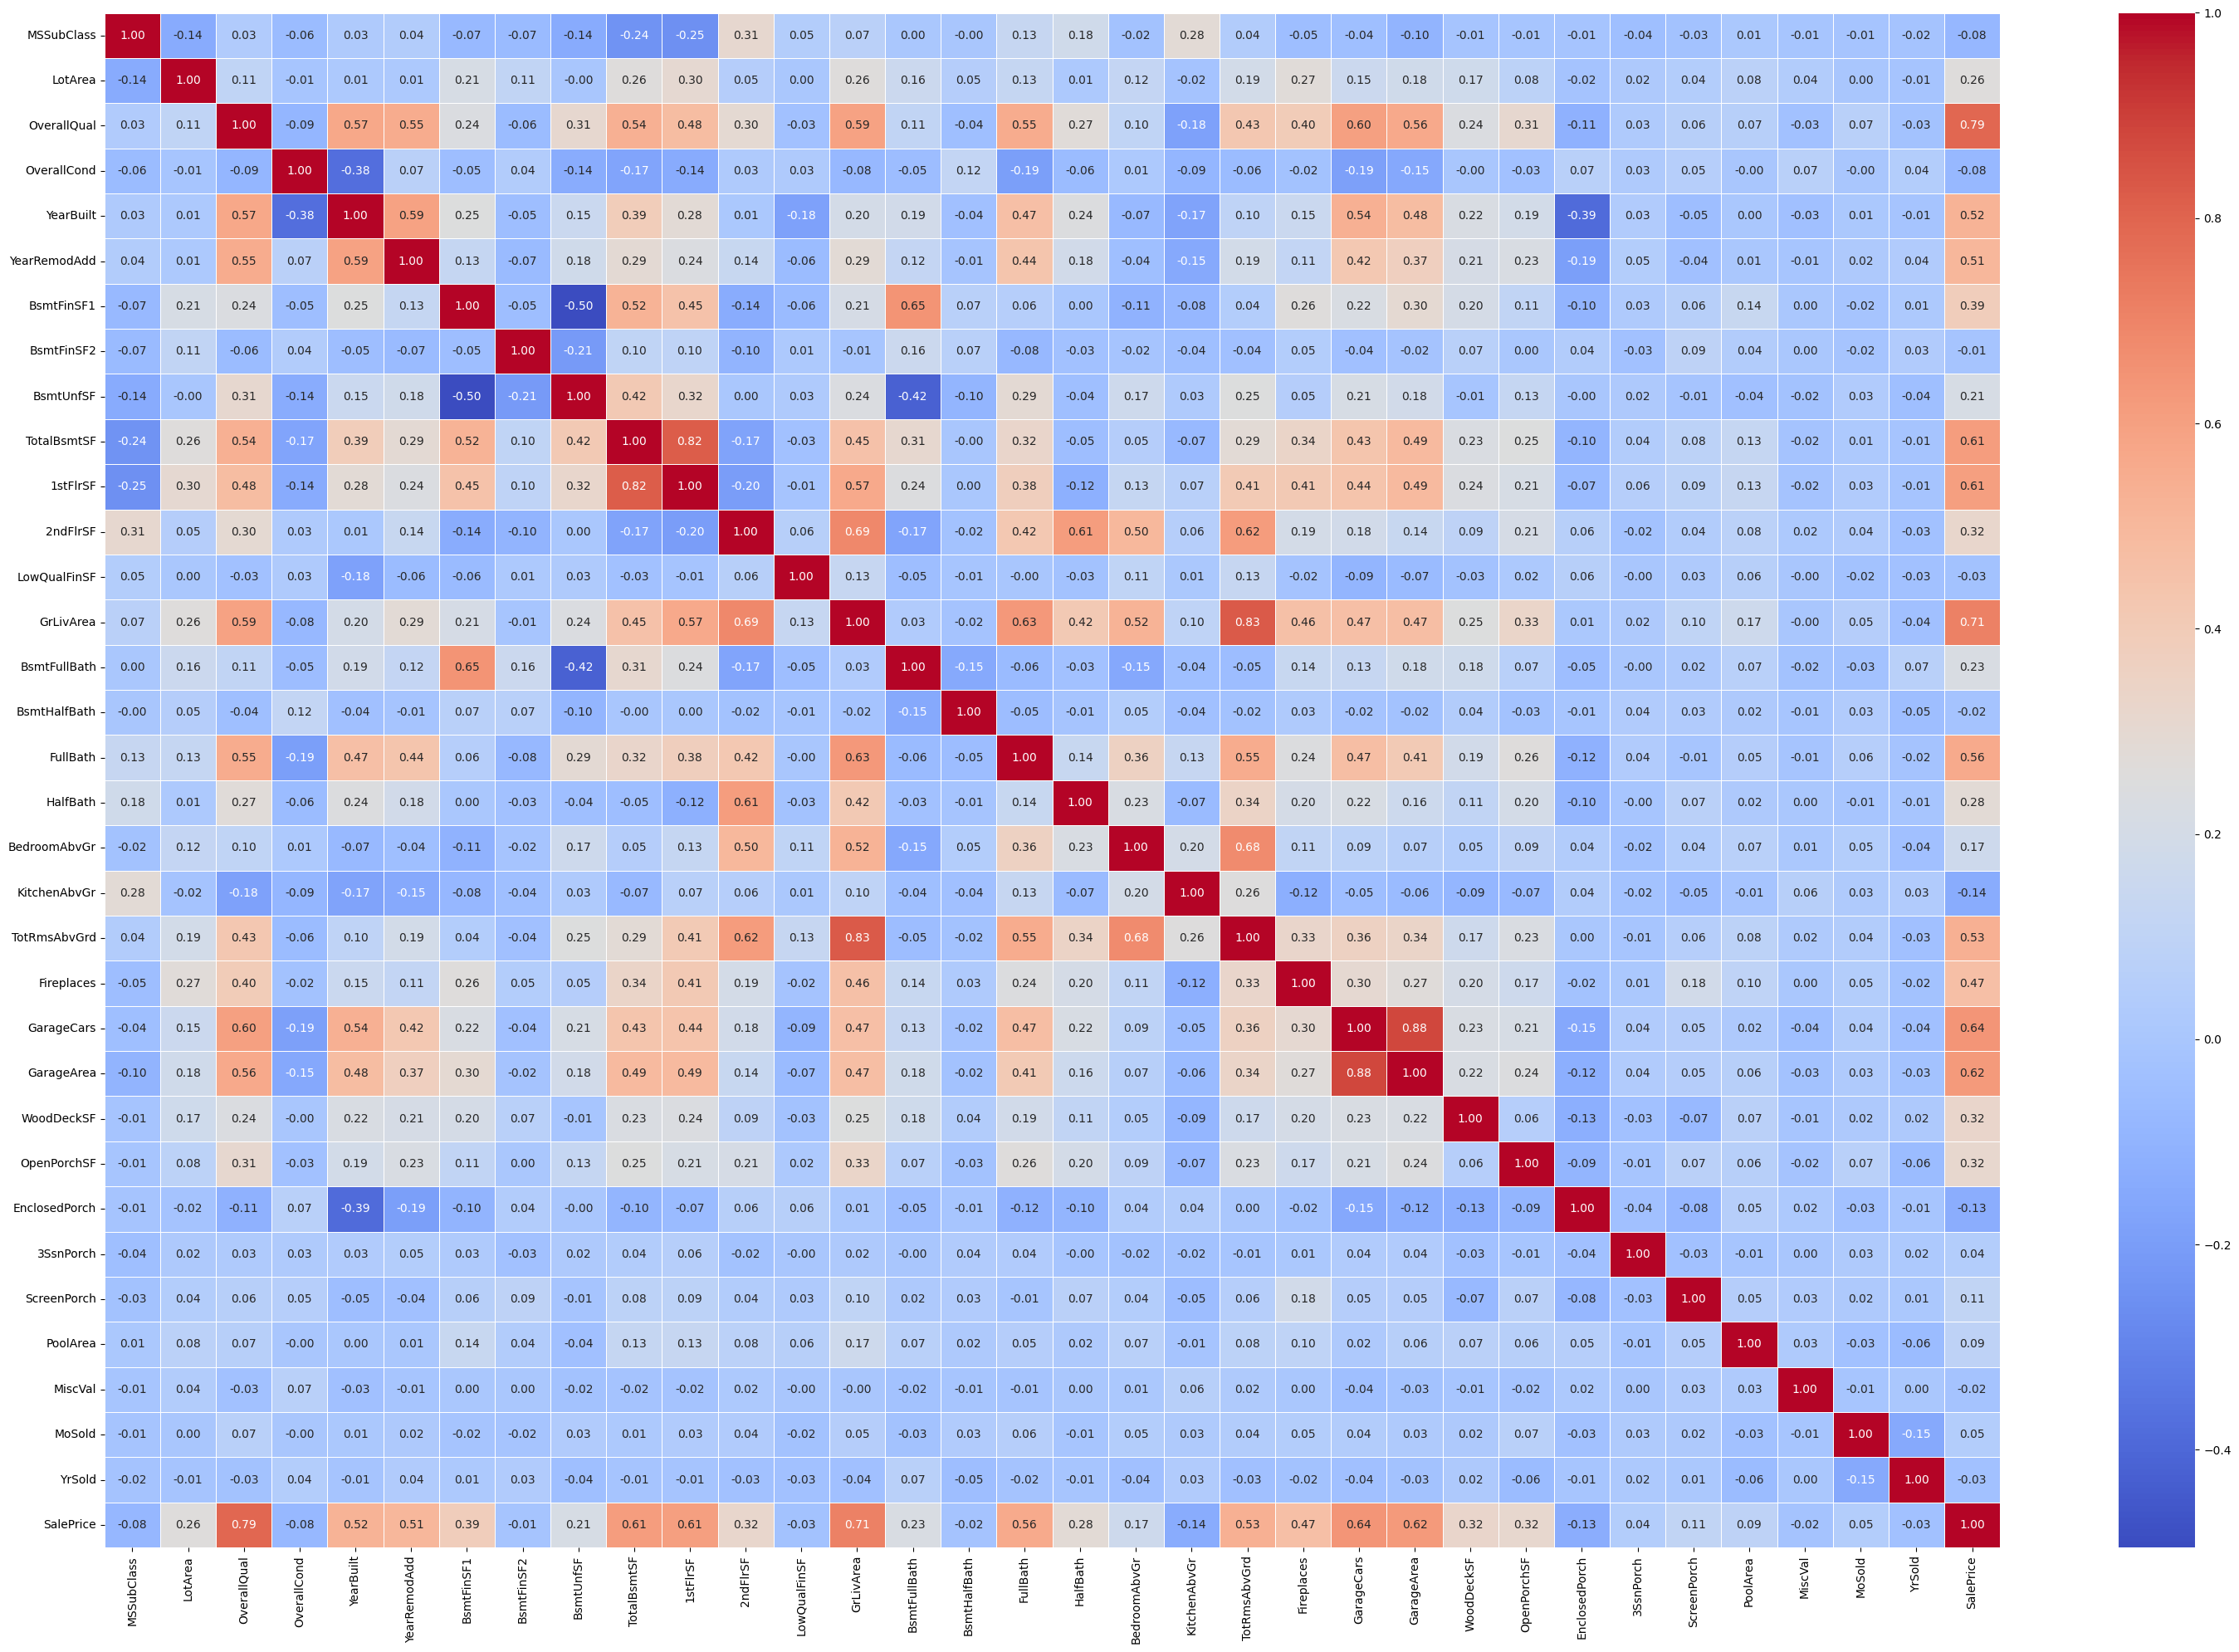

In [18]:
#Se pode fazer correlação até com colunas categóricas?
tabela_correlacao = df_sem_nulos.corr()

# Configure o mapa de calor
plt.figure(figsize=(30, 20))
sns.heatmap(tabela_correlacao, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Ajuste as margens para que a figura completa seja exibida
plt.tight_layout()

# Exiba o mapa de calor
plt.show()


In [19]:
#Só correlacionadas

colunas_desejadas = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea','2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF','SalePrice']
df_filtrado = df_sem_nulos.loc[:, colunas_desejadas]

#Categóricas

colunas_categoricas = ['SaleCondition', 'SaleType', 'PavedDrive', 'Functional', 'KitchenQual', 'CentralAir', 'HeatingQC', 'Heating', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st','RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'Street', 'MSZoning', 'SalePrice' ]
df_filtradoC = df_sem_nulos.loc[:, colunas_categoricas]

# Codificação e correlação das colunas categórias

In [20]:

categoricas = ['SaleCondition', 'SaleType', 'PavedDrive', 'Functional', 'KitchenQual', 'CentralAir', 'HeatingQC', 'Heating', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st','RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'Street', 'MSZoning' ]

df_encoded = pd.get_dummies(df_filtradoC, columns=categoricas)


In [21]:
df_encoded

,SalePrice,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Utilities_AllPub,Utilities_NoSeWa,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,181500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [22]:
#Correlação entre as colunas categóricas e a Price

correlation = df_encoded.corr()['SalePrice']



In [23]:
correlation_sorted = correlation.sort_values(ascending=False)


In [24]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

correlation_sorted


#KitchenQual_Ex           0.504094
#Foundation_PConc         0.497734
#ExterQual_Gd             0.452466
#ExterQual_Ex             0.451164
#HeatingQC_Ex             0.434543
#Neighborhood_NridgHt     0.402149


SalePrice            1.000000
KitchenQual_Ex       0.504094
Foundation_PConc     0.497734
ExterQual_Gd         0.452466
ExterQual_Ex         0.451164
                       ...   
MSZoning_RM         -0.288065
HeatingQC_TA        -0.312677
Foundation_CBlock   -0.343263
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 183, dtype: float64

In [25]:
#Perguntar se as categóricas eu converto para o formato de 0 ou 1 para cada categoria individual, ou só transformo elas em valores numéricos


# Junção das colunas categórias correlacionadas com as tabelas correlacionadas

In [26]:
colunas_altas_correlacao = ['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']
df_correlacao_alta = df_filtrado.join(df_encoded[colunas_altas_correlacao])


In [27]:
df_correlacao_alta.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,2ndFlrSF,WoodDeckSF,OpenPorchSF,SalePrice,KitchenQual_Ex,Foundation_PConc,ExterQual_Gd,ExterQual_Ex,HeatingQC_Ex,Neighborhood_NridgHt
0,7,2003,856,1710,2,8,0,2,548,854,0,61,208500,0,1,1,0,1,0
1,6,1976,1262,1262,2,6,1,2,460,0,298,0,181500,0,0,0,0,1,0
2,7,2001,920,1786,2,6,1,2,608,866,0,42,223500,0,1,1,0,1,0
3,7,1915,756,1717,1,7,1,3,642,756,0,35,140000,0,0,0,0,0,0
4,8,2000,1145,2198,2,9,1,3,836,1053,192,84,250000,0,1,1,0,1,0


# Previsão com os dados categóricos

In [28]:
# Definir as variáveis de entrada (X) e a variável de saída (y)
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']]
y = df_correlacao_alta['SalePrice']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo utilizando a métrica de erro médio quadrático (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 35697.38368410906


# Previsão sem os dados categóricos

In [29]:
# Definir as variáveis de entrada (X) e a variável de saída (y)
X = df_filtrado[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']]
y = df_filtrado['SalePrice']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo utilizando a métrica de erro médio quadrático (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 39267.86367512815


# Classificação

In [30]:

# Definir as variáveis de entrada (X) e a variável de saída (y)
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']]
y = df_correlacao_alta['SalePrice']

# Definir uma função para converter a variável de saída em uma variável binária
def convert_sales_price(price):
    if price > 200000:  # Definindo um limite para classificar o preço como alto ou baixo
        return 1  # Preço alto
    else:
        return 0  # Preço baixo

# Aplicar a função para converter a variável de saída em uma variável binária
y = y.apply(convert_sales_price)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Calcular a precisão
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

# Calcular o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion)

Acurácia: 0.9417808219178082
Precisão: 0.9012345679012346
Recall: 0.8902439024390244
Matriz de Confusão:
[[202   8]
 [  9  73]]


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KMEANS SOBRE O DATASET USADO PARA TREINAMENTO ANTERIORMENTE

In [31]:
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

# Definir o número de clusters desejado
n_clusters = 3

# Criar uma instância do algoritmo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Treinar o modelo de clusterização
kmeans.fit(X)

# Obter os rótulos dos clusters para cada instância
labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao dataset
df_correlacao_alta['Cluster'] = labels

# Visualizar a distribuição dos dados pelos clusters
cluster_counts = df_correlacao_alta['Cluster'].value_counts()
print(cluster_counts)

# Visualizar os centros dos clusters
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    801
0    539
1    120
Name: Cluster, dtype: int64
[[6.84230056e+00 1.98902226e+03 1.18982375e+03 1.74146753e+03
  1.90723562e+00 7.00556586e+00 8.05194805e-01 2.10760668e+00
  5.53901670e+02 6.49350649e-02 7.17996289e-01 6.43784787e-01
  1.85528757e-02 7.16141002e-01 6.12244898e-02 4.69805195e+02
  1.16282004e+02 6.41539889e+01 2.15244377e+05]
 [8.45833333e+00 1.99597500e+03 1.66234167e+03 2.31780833e+03
  2.09166667e+00 8.46666667e+00 1.23333333e+00 2.75833333e+00
  7.63950000e+02 4.83333333e-01 8.75000000e-01 6.00000000e-01
  3.41666667e-01 9.00000000e-01 3.50000000e-01 6.08091667e+02
  1.95900000e+02 8.78833333e+01 3.72625942e+05]
 [5.24594257e+00 1.95561923e+03 8.77716604e+02 1.24318227e+03
  1.25593009e+00 5.89762797e+00 3.90761548e-01 1.38951311e+00
  3.74936330e+02 8.73907615e-03 1.93508115e-01 8.61423221e-02
  1.24843945e-03 3.08364544e-01 2.49687890e-03 2.25234707e+02
  6.41860175e+01 2.87128589e+01 1.29105011e+05]]


# KMEANS USADO NO DATASET ORIGINAL df_sem_nulos POREM SEM AS CATEGÓRICAS (adição das categórias estava causando travamento)

In [32]:
colunas_desejadas2 = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']
df_filtrado2 = df_sem_nulos.loc[:, colunas_desejadas2]

In [33]:
X = df_filtrado2[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']]

# Definir o número de clusters desejado
n_clusters = 3

# Criar uma instância do algoritmo K-means
kmeans2 = KMeans(n_clusters=n_clusters, random_state=42)

# Treinar o modelo de clusterização
kmeans2.fit(X)

# Obter os rótulos dos clusters para cada instância
labels = kmeans2.labels_

# Adicionar os rótulos dos clusters ao dataset
df_filtrado2['Cluster2'] = labels

# Visualizar a distribuição dos dados pelos clusters
cluster_counts = df_filtrado2['Cluster2'].value_counts()
print(cluster_counts)

# Visualizar os centros dos clusters
cluster_centers = kmeans2.cluster_centers_
print(cluster_centers)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    817
2    526
1    117
Name: Cluster2, dtype: int64
[[5.95899633e+01 8.72843084e+03 5.26560588e+00 5.69889841e+00
  1.95637944e+03 1.97527785e+03 3.59195838e+02 4.97037944e+01
  4.69884945e+02 8.78784578e+02 1.01001469e+03 2.31784578e+02
  6.57772338e+00 1.24837699e+03 3.62301102e-01 6.60954712e-02
  1.26805386e+00 2.57037944e-01 2.76988984e+00 1.07588739e+00
  5.90942472e+00 3.90452876e-01 1.40269278e+00 3.77011016e+02
  6.46854345e+01 2.88261934e+01 2.86376989e+01 1.49449204e+00
  1.18678091e+01 1.29253366e+00 5.30159119e+01 6.17747858e+00
  2.00783721e+03 1.29962095e+05]
 [4.62393162e+01 1.65743162e+04 8.48717949e+00 5.30769231e+00
  1.99705128e+03 2.00286325e+03 9.34350427e+02 2.64358974e+01
  7.07564103e+02 1.66835043e+03 1.70746154e+03 6.02581197e+02
  4.88888889e+00 2.31493162e+03 7.52136752e-01 3.41880342e-02
  2.08547009e+00 6.06837607e-01 3.04273504e+00 1.00000000e+00
  8.45299145e+00 1.23076923e+00 2.76068376e+00 7.64324786e+02
  1.94991453e+02 8.93760684e+01 9.04273504e

# Redução de dimensionalidade

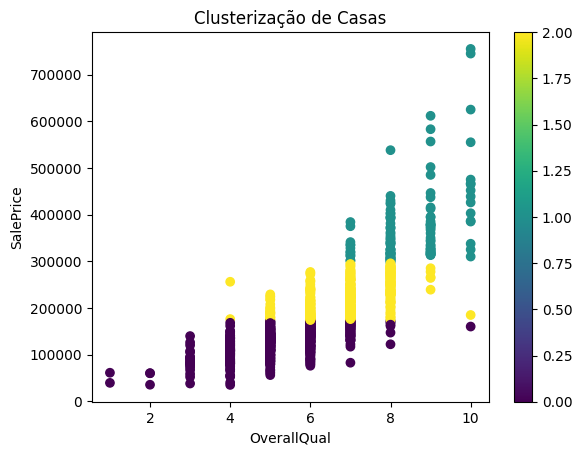

In [34]:
# Plotar os resultados da clusterização em um gráfico de dispersão envolvendo qualidade e preço

plt.scatter(df_correlacao_alta['OverallQual'], df_correlacao_alta['SalePrice'], c=labels, cmap='viridis')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Clusterização de Casas')
plt.colorbar()
plt.show()

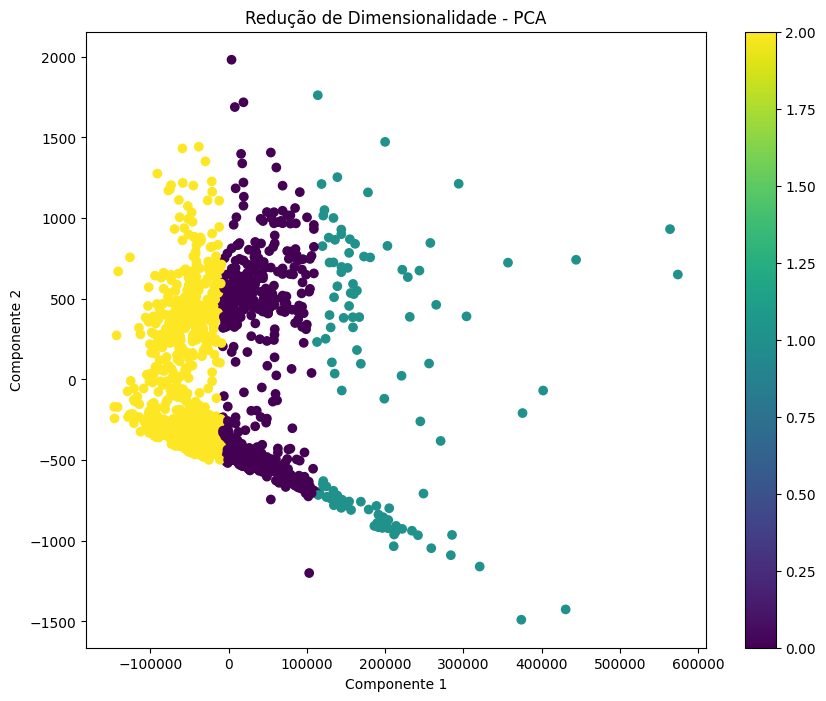

In [35]:
# Selecionar as características relevantes para a redução de dimensionalidade
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

# Criar uma instância do PCA
pca = PCA(n_components=2)

# Aplicar o PCA aos dados
X_pca = pca.fit_transform(X)

# Criar um DataFrame com os dados reduzidos para visualização
pca_df = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])

# Adicionar os rótulos dos clusters ao DataFrame
pca_df['Cluster'] = df_correlacao_alta['Cluster']

# Aumentar o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Plotar os resultados da redução de dimensionalidade em um gráfico de dispersão
plt.scatter(pca_df['Componente 1'], pca_df['Componente 2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Redução de Dimensionalidade - PCA')
plt.colorbar()
plt.show()

# Análise de associação

In [45]:

# Selecionar apenas as características relevantes para a análise de associação
df_cluster1 = df_correlacao_alta[df_correlacao_alta['Cluster'] == 0][['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']]
df_cluster2 = df_correlacao_alta[df_correlacao_alta['Cluster'] == 1][['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']]
df_cluster3 = df_correlacao_alta[df_correlacao_alta['Cluster'] == 2][['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']]

# Função para aplicar o algoritmo Apriori e retornar as regras de associação
def apply_apriori(df):
    # Aplicar o algoritmo Apriori para identificar itens frequentes
    frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

    # Gerar as regras de associação
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

    return rules

# Aplicar o algoritmo Apriori e obter as regras de associação para cada cluster
rules_cluster1 = apply_apriori(df_cluster1)
rules_cluster2 = apply_apriori(df_cluster2)
rules_cluster3 = apply_apriori(df_cluster3)

# Imprimir as regras de associação para cada cluster
print('Regras de Associação - Cluster 1:')
print(rules_cluster1)
print()

print('Regras de Associação - Cluster 2:')
print(rules_cluster3)
print()

print('Regras de Associação - Cluster 3:')
print(rules_cluster3)

Regras de Associação - Cluster 1:
                         antecedents                       consequents  \
0                     (ExterQual_Gd)                (Foundation_PConc)   
1                 (Foundation_PConc)                    (ExterQual_Gd)   
2                     (HeatingQC_Ex)                (Foundation_PConc)   
3                 (Foundation_PConc)                    (HeatingQC_Ex)   
4                     (HeatingQC_Ex)                    (ExterQual_Gd)   
5                     (ExterQual_Gd)                    (HeatingQC_Ex)   
6       (HeatingQC_Ex, ExterQual_Gd)                (Foundation_PConc)   
7   (Foundation_PConc, ExterQual_Gd)                    (HeatingQC_Ex)   
8   (HeatingQC_Ex, Foundation_PConc)                    (ExterQual_Gd)   
9                     (ExterQual_Gd)  (HeatingQC_Ex, Foundation_PConc)   
10                    (HeatingQC_Ex)  (Foundation_PConc, ExterQual_Gd)   
11                (Foundation_PConc)      (HeatingQC_Ex, ExterQual_Gd)   

   

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [51]:
rules_cluster1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ExterQual_Gd),(Foundation_PConc),0.643785,0.717996,0.569573,0.884726,1.232216,0.107338,2.446382,0.529045
1,(Foundation_PConc),(ExterQual_Gd),0.717996,0.643785,0.569573,0.793282,1.232216,0.107338,1.723191,0.668267
2,(HeatingQC_Ex),(Foundation_PConc),0.716141,0.717996,0.619666,0.865285,1.205139,0.105479,2.093335,0.599663
3,(Foundation_PConc),(HeatingQC_Ex),0.717996,0.716141,0.619666,0.863049,1.205139,0.105479,2.072706,0.603609
4,(HeatingQC_Ex),(ExterQual_Gd),0.716141,0.643785,0.556586,0.777202,1.207239,0.095546,1.598826,0.604749
5,(ExterQual_Gd),(HeatingQC_Ex),0.643785,0.716141,0.556586,0.864553,1.207239,0.095546,2.095725,0.481910
6,"(HeatingQC_Ex, ExterQual_Gd)",(Foundation_PConc),0.556586,0.717996,0.525046,0.943333,1.313842,0.125420,4.976536,0.538714
7,"(Foundation_PConc, ExterQual_Gd)",(HeatingQC_Ex),0.569573,0.716141,0.525046,0.921824,1.287210,0.117152,3.631030,0.518384
8,"(HeatingQC_Ex, Foundation_PConc)",(ExterQual_Gd),0.619666,0.643785,0.525046,0.847305,1.316131,0.126115,2.332860,0.631544
9,(ExterQual_Gd),"(HeatingQC_Ex, Foundation_PConc)",0.643785,0.619666,0.525046,0.815562,1.316131,0.126115,2.062123,0.674304


In [52]:
rules_cluster2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(KitchenQual_Ex),(Foundation_PConc),0.483333,0.875000,0.458333,0.948276,1.083744,0.035417,2.416667,0.149560
1,(Foundation_PConc),(KitchenQual_Ex),0.875000,0.483333,0.458333,0.523810,1.083744,0.035417,1.085000,0.618182
2,(ExterQual_Ex),(KitchenQual_Ex),0.341667,0.483333,0.291667,0.853659,1.766190,0.126528,3.530556,0.658951
3,(KitchenQual_Ex),(ExterQual_Ex),0.483333,0.341667,0.291667,0.603448,1.766190,0.126528,1.660145,0.839631
4,(HeatingQC_Ex),(KitchenQual_Ex),0.900000,0.483333,0.466667,0.518519,1.072797,0.031667,1.073077,0.678571
...,...,...,...,...,...,...,...,...,...,...
205,(Neighborhood_NridgHt),"(ExterQual_Ex, HeatingQC_Ex, KitchenQual_Ex, F...",0.350000,0.283333,0.175000,0.500000,1.764706,0.075833,1.433333,0.666667
206,(HeatingQC_Ex),"(Neighborhood_NridgHt, ExterQual_Ex, KitchenQu...",0.900000,0.175000,0.175000,0.194444,1.111111,0.017500,1.024138,1.000000
207,(Foundation_PConc),"(Neighborhood_NridgHt, ExterQual_Ex, HeatingQC...",0.875000,0.183333,0.175000,0.200000,1.090909,0.014583,1.020833,0.666667
208,(ExterQual_Ex),"(Neighborhood_NridgHt, HeatingQC_Ex, KitchenQu...",0.341667,0.241667,0.175000,0.512195,2.119428,0.092431,1.554583,0.802291


In [53]:
rules_cluster3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(HeatingQC_Ex),(Foundation_PConc),0.308365,0.193508,0.108614,0.352227,1.820217,0.048943,1.245022,0.651521
1,(Foundation_PConc),(HeatingQC_Ex),0.193508,0.308365,0.108614,0.561290,1.820217,0.048943,1.576522,0.558735


# Análise de outlier

In [72]:
# Remova valores ausentes, normalize atributos, se necessário

# Escolhendo o número de vizinhos (hiperparâmetro)
n_neighbors = 20

# Calculando a densidade local
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
outlier_scores = clf.fit_predict(df_correlacao_alta)

# Calculando o fator de outlier local (LOF)
lof_scores = clf.negative_outlier_factor_

# Definindo um limite de outlier
outlier_threshold = -2.5

# Identificando os outliers
outliers = df_correlacao_alta[lof_scores < outlier_threshold]

# Exibir os outliers encontrados
print("Outliers encontrados:")
print(outliers)

Outliers encontrados:
      OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  TotRmsAbvGrd  \
523            10       2007         3138       4676         3            11   
691            10       1994         2444       4316         3            10   
803             9       2008         1734       2822         3            12   
898             9       2009         2330       2364         2            11   
1169           10       1995         1930       3627         3            10   
1182           10       1996         2396       4476         3            10   
1298           10       2008         6110       5642         2            12   

      Fireplaces  GarageCars  GarageArea  2ndFlrSF  WoodDeckSF  OpenPorchSF  \
523            1           3         884      1538         208          406   
691            2           3         832      1872         382           50   
803            1           3        1020      1088          52          170   
898            2     

In [73]:
outliers

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,2ndFlrSF,WoodDeckSF,OpenPorchSF,SalePrice,KitchenQual_Ex,Foundation_PConc,ExterQual_Gd,ExterQual_Ex,HeatingQC_Ex,Neighborhood_NridgHt,Cluster
523,10,2007,3138,4676,3,11,1,3,884,1538,208,406,184750,1,1,0,1,1,0,0
691,10,1994,2444,4316,3,10,2,3,832,1872,382,50,755000,1,1,0,1,1,0,1
803,9,2008,1734,2822,3,12,1,3,1020,1088,52,170,582933,1,1,0,1,1,1,1
898,9,2009,2330,2364,2,11,2,3,820,0,0,67,611657,1,1,0,1,1,1,1
1169,10,1995,1930,3627,3,10,1,3,807,1796,361,76,625000,0,1,1,0,1,0,1
1182,10,1996,2396,4476,3,10,2,3,813,2065,171,78,745000,1,1,1,0,1,0,1
1298,10,2008,6110,5642,2,12,3,2,1418,950,214,292,160000,1,1,0,1,1,0,2


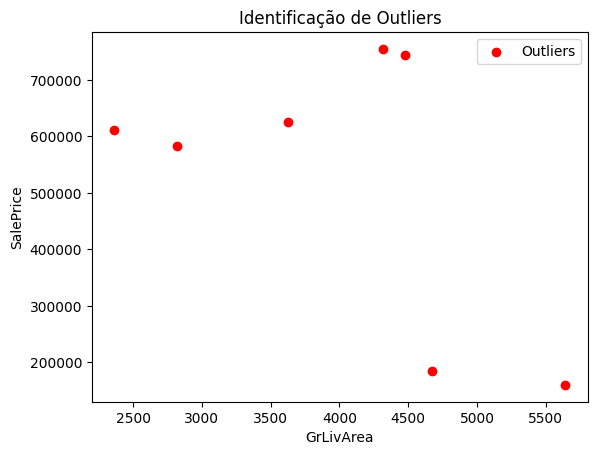

In [89]:
# Visualização das outliers

# Dados das casas identificadas como outliers
outliers = [
    (4676, 184750),
    (4316, 755000),
    (2822, 582933),
    (2364, 611657),
    (3627, 625000),
    (4476, 745000),
    (5642, 160000)
]


# Plot dos dados das casas identificadas como outliers
x_outliers = [df_correlacao_alta[0] for df_correlacao_alta in outliers]
y_outliers = [df_correlacao_alta[1] for df_correlacao_alta in outliers]
plt.scatter(x_outliers, y_outliers, c='red', label='Outliers')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Identificação de Outliers')
plt.legend()
plt.show()